<a href="https://colab.research.google.com/github/Saumyajit07/Multiple-Deases-Detection-Using-ML/blob/main/heart_diseases2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'heart.csv', 'sample_data']


In [ ]:
dataset = pd.read_csv("heart.csv")

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.shape

(1025, 14)

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
447,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
621,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
315,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1
712,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1
755,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Describe column

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Analysing "Target" variable

In [ ]:
dataset["target"].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [ ]:
dataset["target"].unique()

array([0, 1])

checking corelation

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64


Analysing Target Value

In [ ]:
y = dataset["target"]
target_temp = dataset.target.value_counts()
print(target_temp)

1    526
0    499
Name: target, dtype: int64


<Axes: >

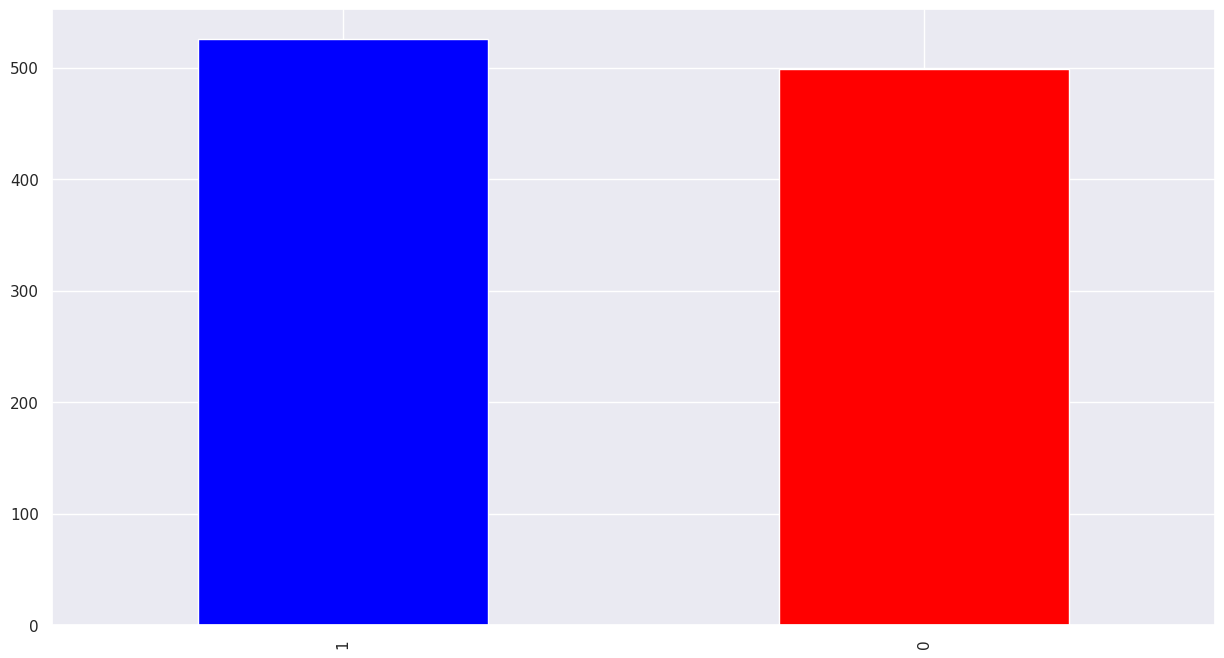

In [ ]:
dataset.target.value_counts().plot(kind="bar",color=["blue","red"])

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 164.69
Percentage of patience with heart problems: 173.6


Analysing  'Sex'

In [ ]:
dataset["sex"].unique()

array([1, 0])

In [ ]:
y = dataset["sex"]
sex_temp = dataset.sex.value_counts()
print(sex_temp)


1    713
0    312
Name: sex, dtype: int64


<Axes: >

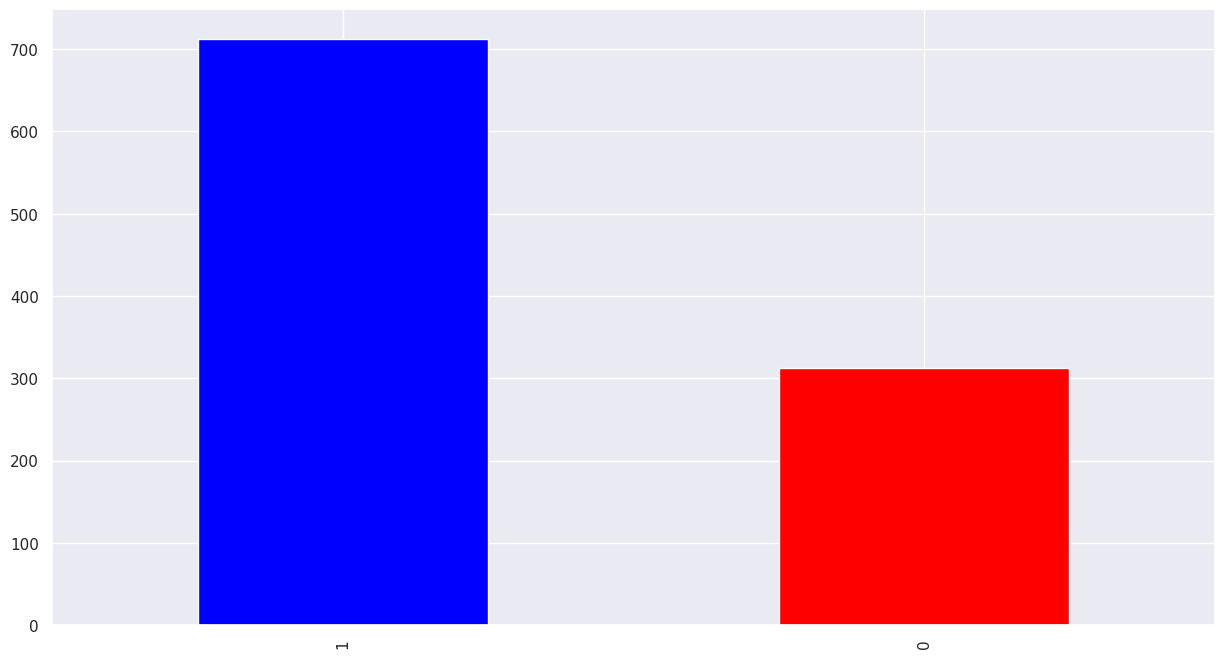

In [ ]:
dataset.sex.value_counts().plot(kind="bar",color=["blue","red"])

Analysing the 'Chest Pain Type'

In [ ]:
dataset["cp"].unique()

array([0, 1, 2, 3])

0    497
2    284
1    167
3     77
Name: cp, dtype: int64


<Axes: >

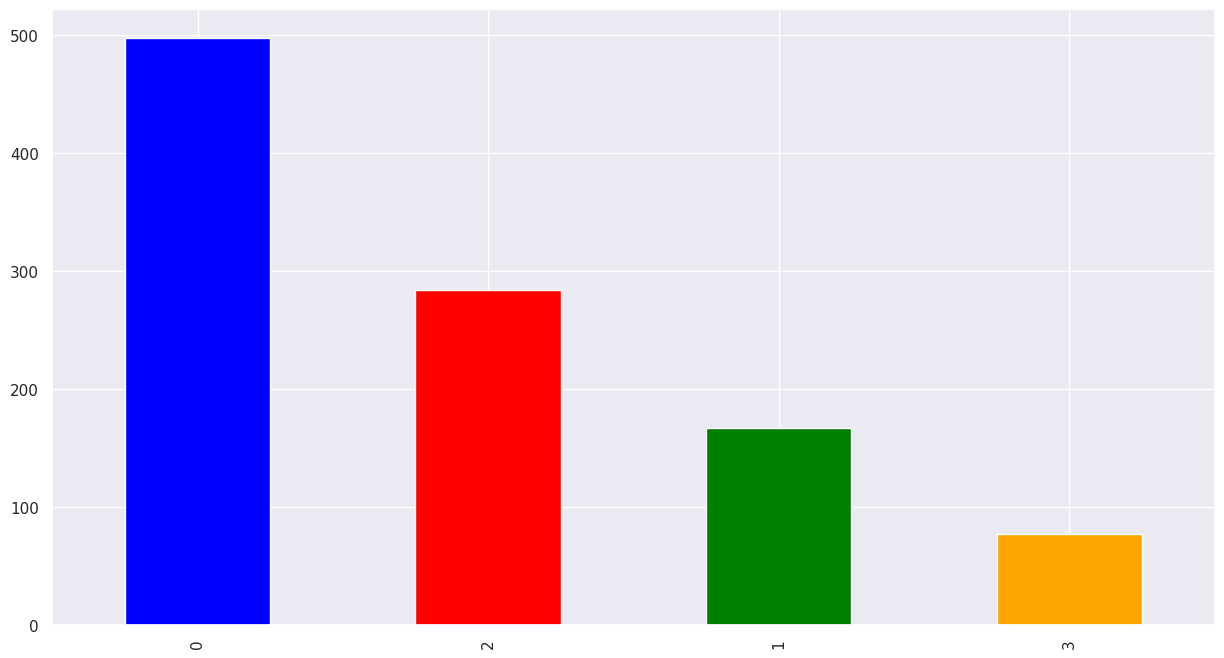

In [ ]:
y = dataset["cp"]
cp_temp = dataset.cp.value_counts()
print(cp_temp)
dataset.cp.value_counts().plot(kind="bar",color=["blue","red","green","orange"])

Analysing the FBS

In [ ]:
dataset["fbs"].describe()

count    1025.000000
mean        0.149268
std         0.356527
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fbs, dtype: float64

In [ ]:
dataset["fbs"].unique()

array([0, 1])

0    872
1    153
Name: fbs, dtype: int64


<Axes: >

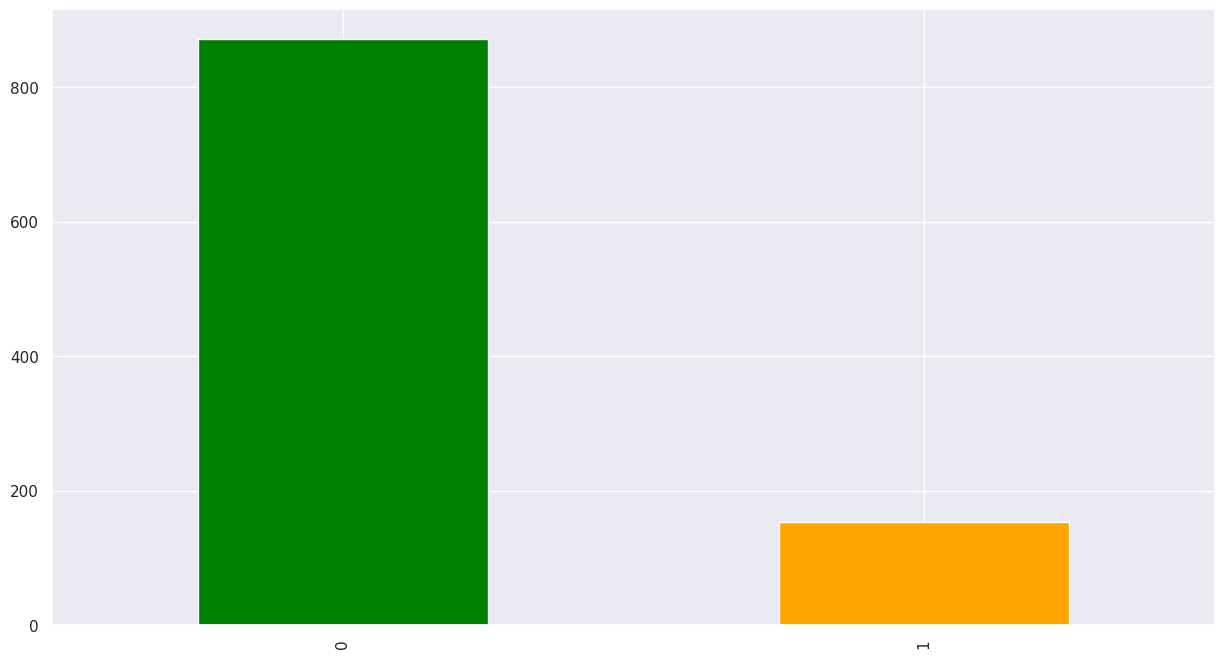

In [ ]:
y = dataset["fbs"]
fbs_temp = dataset.fbs.value_counts()
print(fbs_temp)
dataset.fbs.value_counts().plot(kind="bar",color=["green","orange"])

Analysing the restecg

In [ ]:
dataset["restecg"].unique()

array([1, 0, 2])

1    513
0    497
2     15
Name: restecg, dtype: int64


<Axes: >

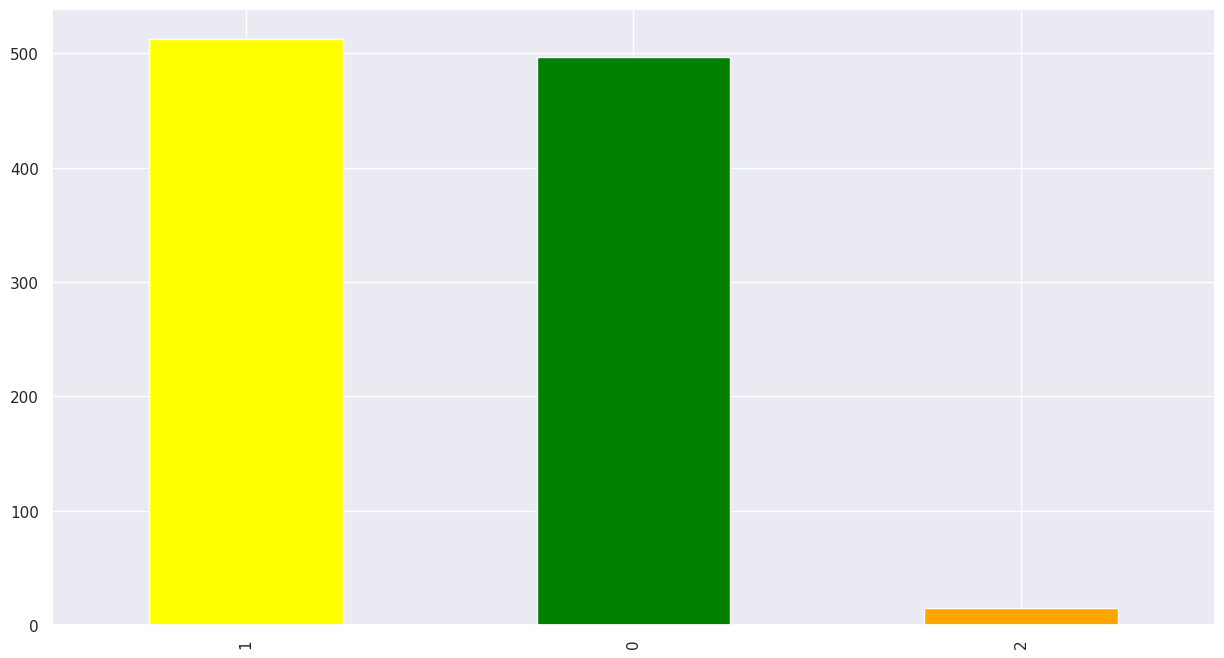

In [ ]:
y = dataset["restecg"]
restecg_temp = dataset.restecg.value_counts()
print(restecg_temp)
dataset.restecg.value_counts().plot(kind="bar",color=["yellow","green","orange"])

Analysing the 'exang'

In [ ]:
dataset["exang"].unique()

array([0, 1])

0    680
1    345
Name: exang, dtype: int64


<Axes: >

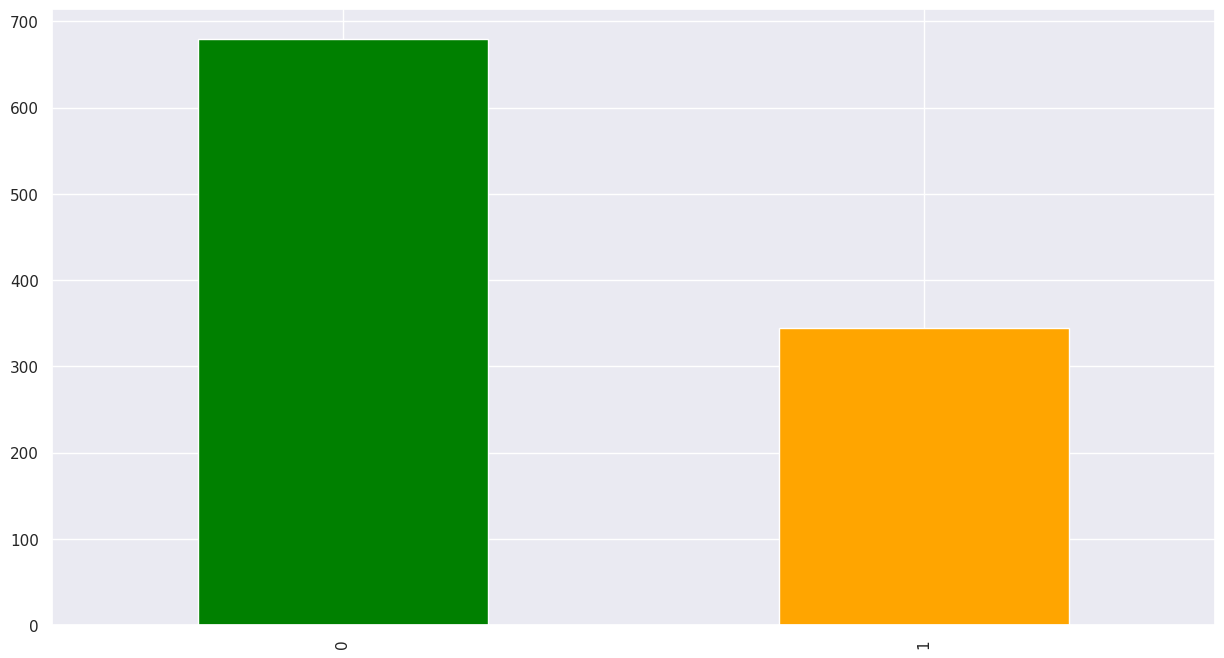

In [ ]:
y = dataset["exang"]
exang_temp = dataset.exang.value_counts()
print(exang_temp)
dataset.exang.value_counts().plot(kind="bar",color=["green","orange"])

Analysing the Slope

In [ ]:
dataset["slope"].unique()

array([2, 0, 1])

1    482
2    469
0     74
Name: slope, dtype: int64


<Axes: >

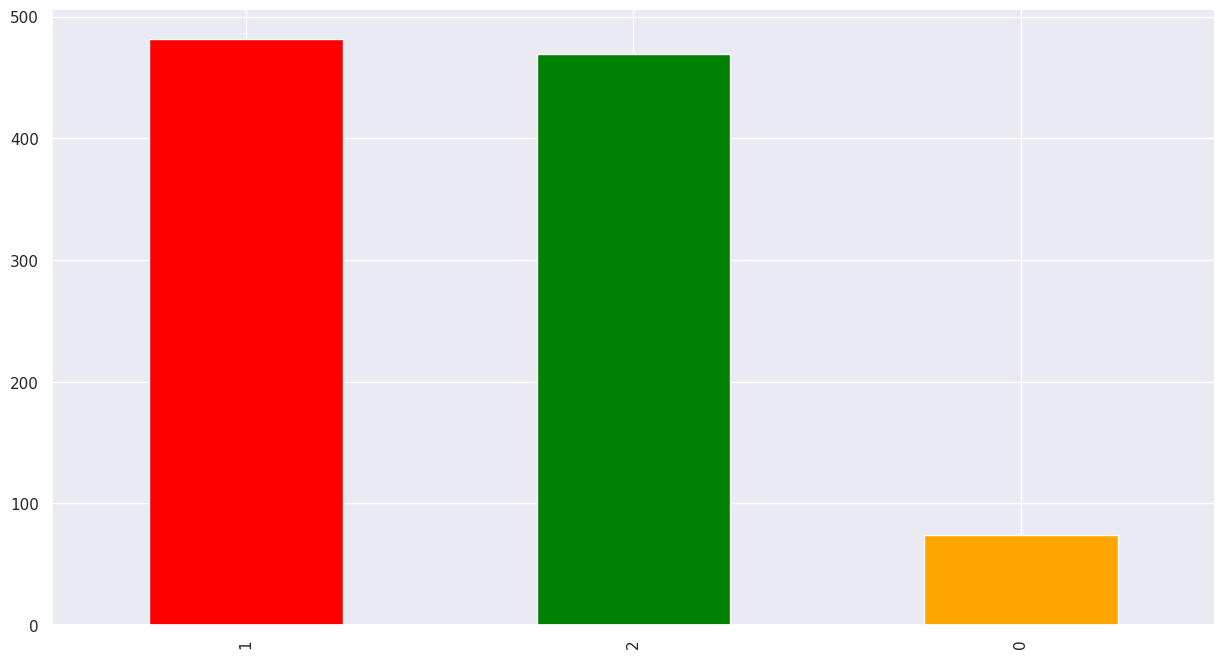

In [ ]:
y = dataset["slope"]
slope_temp = dataset.slope.value_counts()
print(slope_temp)
dataset.slope.value_counts().plot(kind="bar",color=["red","green","orange"])

Analysing the 'ca'

In [ ]:
dataset["ca"].unique()

array([2, 0, 1, 3, 4])

Analysing the 'thal' 

In [ ]:
dataset["thal"].unique()

array([3, 2, 1, 0])

2    544
3    410
1     64
0      7
Name: thal, dtype: int64


<Axes: >

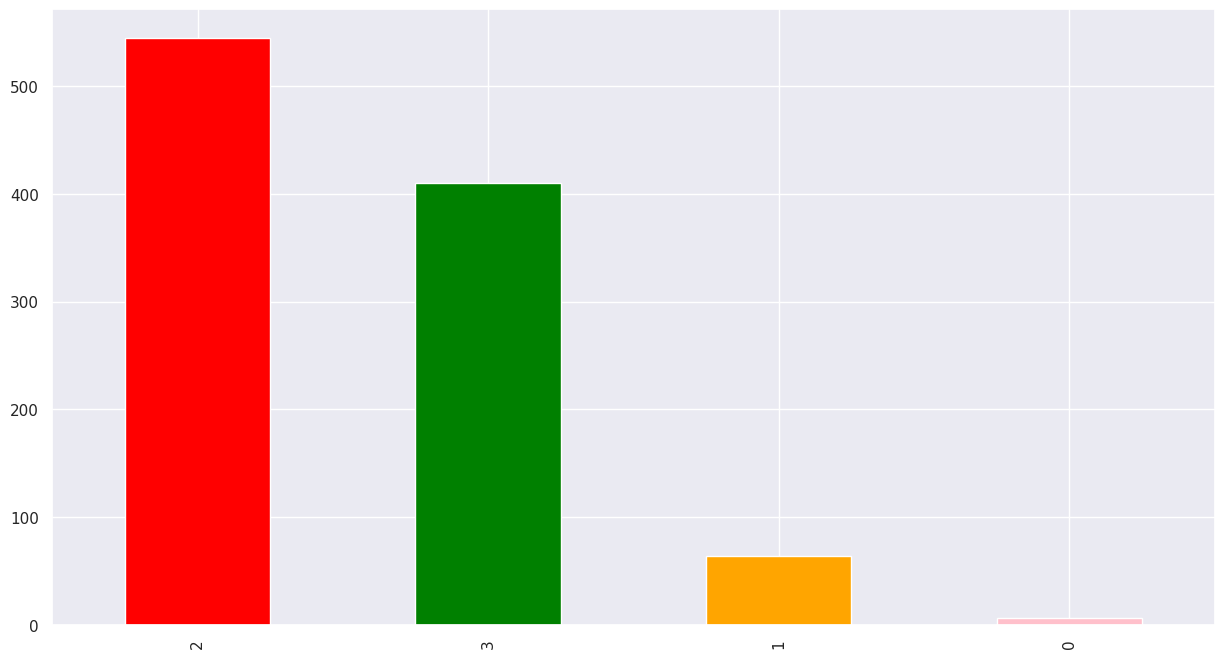

In [ ]:
y = dataset["thal"]
thal_temp = dataset.thal.value_counts()
print(thal_temp)
dataset.thal.value_counts().plot(kind="bar",color=["red","green","orange","pink"])

Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

(820, 13)

In [ ]:
X_test.shape

(205, 13)

In [ ]:
Y_train.shape

(820,)

In [ ]:
Y_test.shape

(205,)

In [ ]:
from sklearn.metrics import accuracy_score

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(205,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [ ]:
Y_pred_nb.shape

(205,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.37 %


SVM

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [ ]:
Y_pred_svm.shape

(205,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 83.9 %


K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [ ]:
Y_pred_knn.shape

(205,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 72.2 %


In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 86.34 %
The accuracy score achieved using Naive Bayes is: 85.37 %
The accuracy score achieved using Support Vector Machine is: 83.9 %
The accuracy score achieved using K-Nearest Neighbors is: 72.2 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

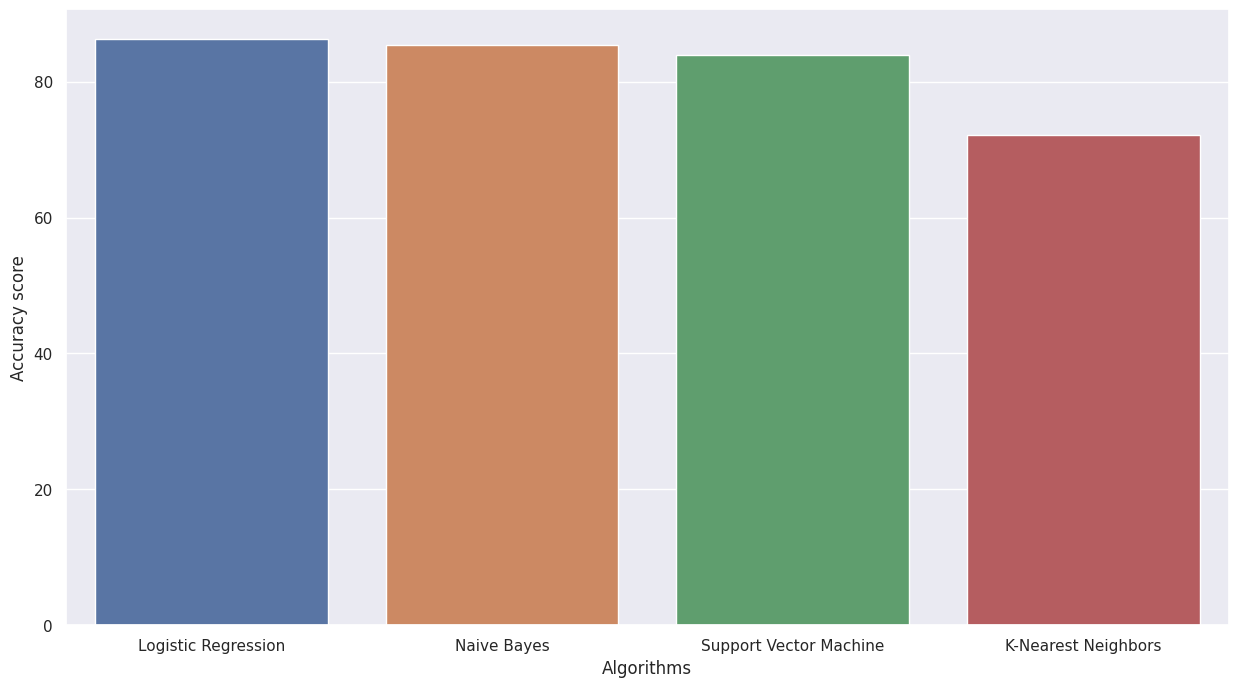

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors"]
scores = [score_lr,score_nb,score_svm,score_knn]

sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms, y=scores)


In [ ]:
import pickle

In [ ]:
saved_model2 = pickle.dumps(lr)

In [ ]:
lr_from_pickle = pickle.loads(saved_model2)

In [ ]:
lr_from_pickle.predict(X_test)


array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1])

In [ ]:
input=(52,1,1,134,201,0,1,158,0,0.8,2,1,2)
input_as_numpy=np.asarray(input)
input_reshaped=input_as_numpy.reshape(1,-1)
pre1=lr.predict(input_reshaped)
if(pre1==1): 
  print("The person has heart diseases")
else:
  print("The person does not has heart diseases")

The person has heart diseases
